# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('../../diabetes.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cek Missing Values di Setiap Kolom

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cek Data Duplikat

In [5]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Membagi Dataset Berdasarkan Jenis Data

In [6]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

# Data Numerik

In [7]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head())

Kolom Numerik:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Dataset Numerik:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# Data Kategorikal

In [8]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_categorical.head())


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
   Outcome
0        1
1        0
2        1
3        0
4        1


# Periksa Skala pada Data Numerikal

In [9]:
df[numerical_features].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Periksa Outlier pada Data Numerikal

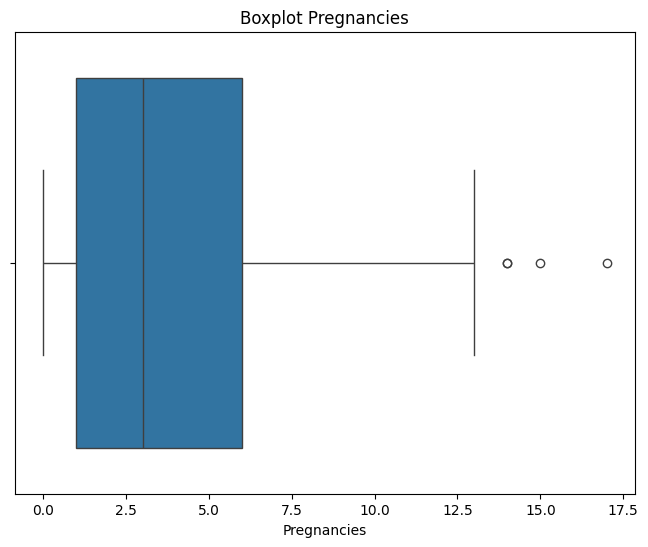

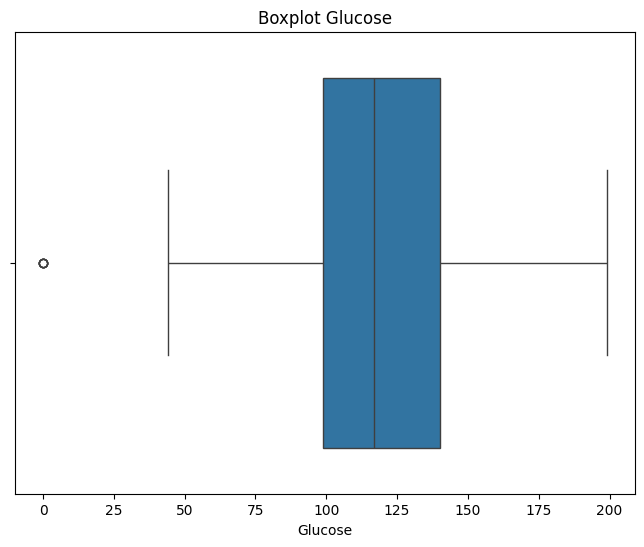

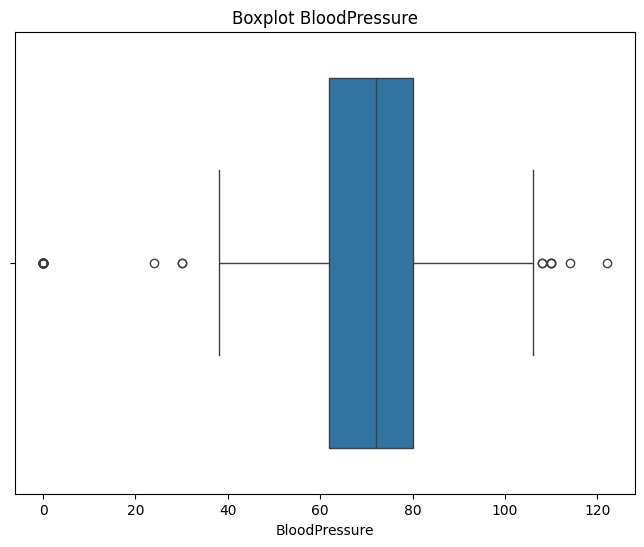

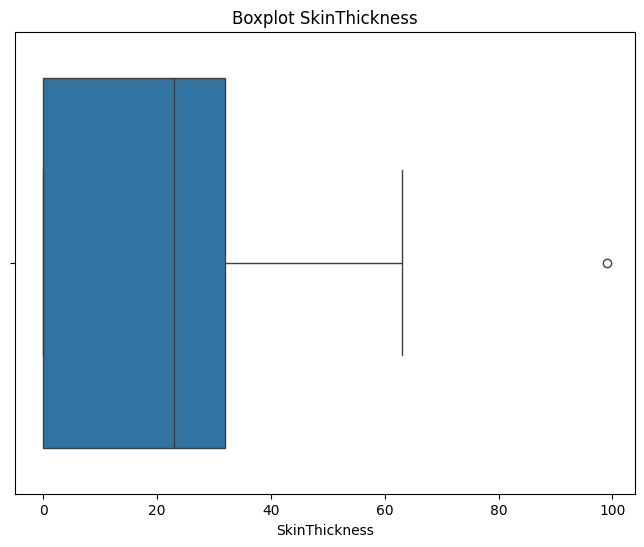

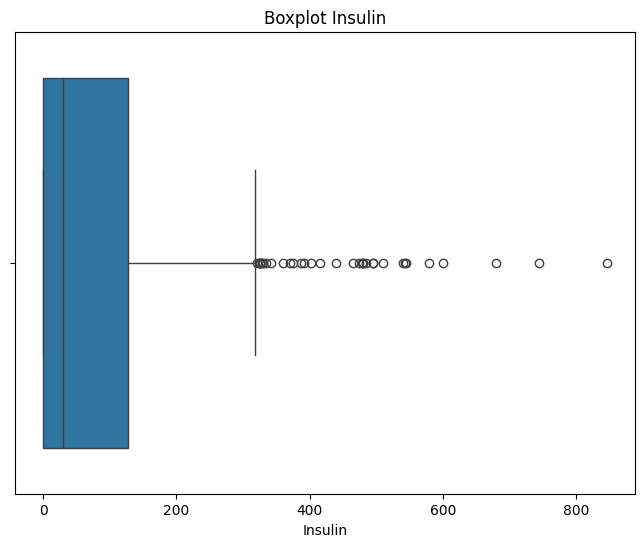

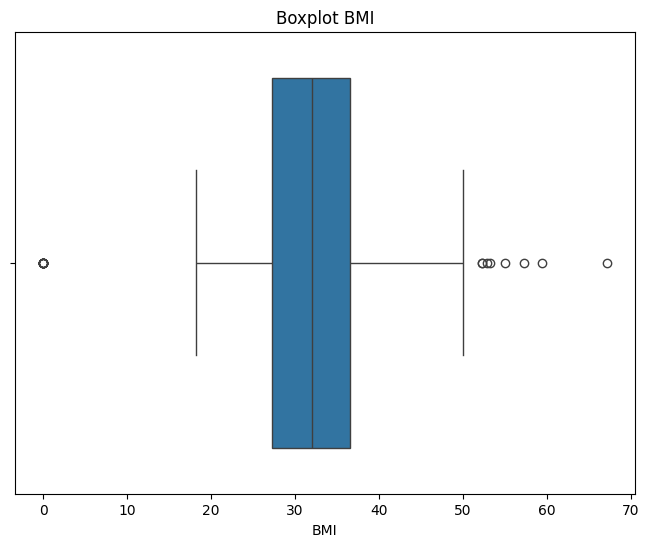

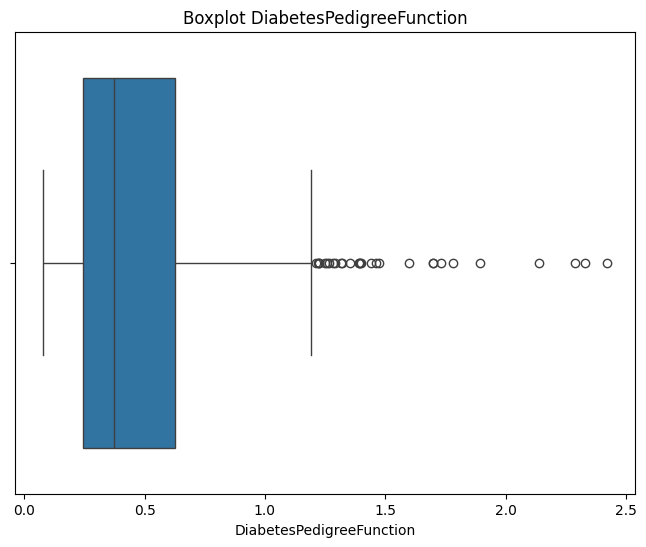

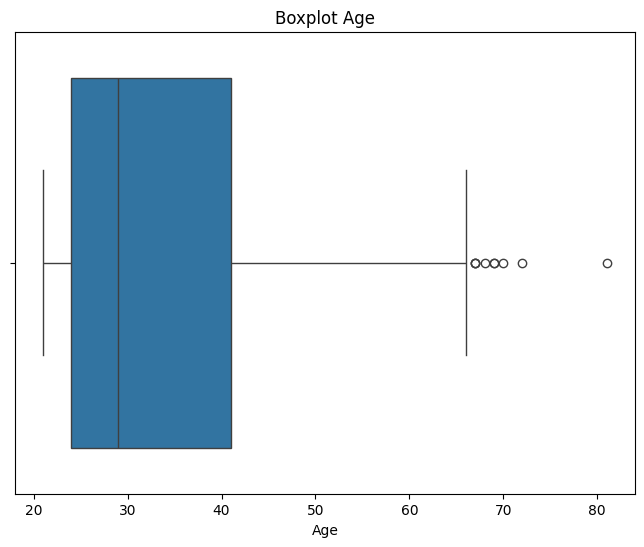

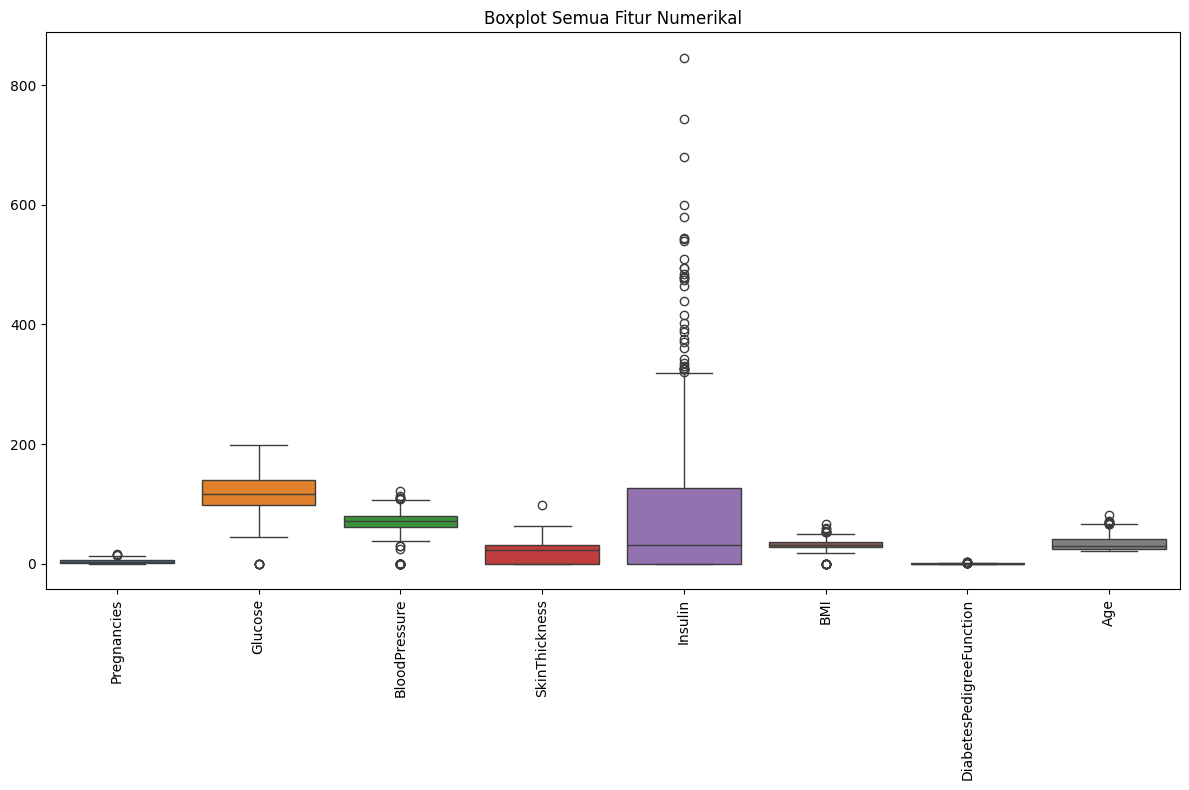

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan satu per satu boxplot
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()

# Menampilkan semua fitur dalam satu visualisasi
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot Semua Fitur Numerikal')
plt.xticks(rotation=90)  # Rotasi nama fitur agar lebih mudah dibaca
plt.tight_layout()
plt.show()


# Periksa Nilai Unik pada Data Kategorikal (Outcome)

In [11]:
# Periksa nilai unik untuk setiap kolom dalam categorical_features
for col in categorical_features:
    print(f"{col} has {df[col].unique()} values\n")


Outcome has [1 0] values



# Membagi Dataset Menjadi Data Training dan Data Testing

In [12]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data training dan data testing
X = df.drop('Outcome', axis=1)  # Fitur (tanpa kolom 'Outcome')
y = df['Outcome']  # Target (kolom 'Outcome')

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan kembali X_train dan y_train menjadi satu dataframe untuk diekspor
train_df = pd.concat([X_train, y_train], axis=1)

# Menggabungkan kembali X_test dan y_test menjadi satu dataframe untuk diekspor
test_df = pd.concat([X_test, y_test], axis=1)

# Mengekspor dataset training dan testing ke file CSV
train_df.to_csv('diabetes_train.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)

print("Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv")


Data training dan testing berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv


# Data Training

In [13]:
# Menampilkan 5 baris pertama dari dataset training
print("Data Training:")
print(train_df.head())


Data Training:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1  


# Data Testing

In [14]:
# Menampilkan 5 baris pertama dari dataset testing
print("Data Testing:")
print(test_df.head())


Data Testing:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Outcome  
668                     0.430   43        0  
324                     0.148   21        0  
624                     0.158   21        0  
690                     0.856   34        0  
473                     0.210   50        0  


# Normalisasi dengan Metode Min-Max Scaling

In [15]:
import pandas as pd
import numpy as np

# Fungsi untuk normalisasi decimal scaling
def decimal_scaling(df):
    df_normalized = df.copy()
    for column in df.columns:
        max_val = df[column].max()
        k = np.ceil(np.log10(max_val)) if max_val != 0 else 0  # Menghitung k
        df_normalized[column] = df[column] / (10 ** int(k))  # Normalisasi
    return df_normalized

# Normalisasi data training dan testing
X_train_normalized = decimal_scaling(X_train)
X_test_normalized = decimal_scaling(X_test)

# Menggabungkan kembali data yang sudah dinormalisasi dengan target
train_scaled_df = pd.concat([X_train_normalized, y_train], axis=1)
test_scaled_df = pd.concat([X_test_normalized, y_test], axis=1)

# Mengekspor data yang sudah dinormalisasi ke file CSV
train_scaled_df.to_csv('diabetes_train.csv', index=False)
test_scaled_df.to_csv('diabetes_test.csv', index=False)

print("Data training dan testing setelah normalisasi decimal scaling berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv")


Data training dan testing setelah normalisasi decimal scaling berhasil diekspor ke diabetes_train.csv dan diabetes_test.csv


# Data Training Ternormalisasi

In [16]:
# Menampilkan 5 baris pertama dari data training yang sudah dinormalisasi
print("Data Training Setelah Normalisasi:")
print(train_scaled_df.head())


Data Training Setelah Normalisasi:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
60          0.02    0.084          0.000           0.00    0.000  0.000   
618         0.09    0.112          0.082           0.24    0.000  0.282   
346         0.01    0.139          0.046           0.19    0.083  0.287   
294         0.00    0.161          0.050           0.00    0.000  0.219   
231         0.06    0.134          0.080           0.37    0.370  0.462   

     DiabetesPedigreeFunction   Age  Outcome  
60                     0.0304  0.21        0  
618                    0.1282  0.50        1  
346                    0.0654  0.22        0  
294                    0.0254  0.65        0  
231                    0.0238  0.46        1  


# Data Testing Ternormalisasi

In [17]:
# Menampilkan 5 baris pertama dari data testing yang sudah dinormalisasi
print("Data Testing Setelah Normalisasi:")
print(test_scaled_df.head())


Data Testing Setelah Normalisasi:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
668         0.06    0.098          0.058           0.33     0.19  0.340   
324         0.02    0.112          0.075           0.32     0.00  0.357   
624         0.02    0.108          0.064           0.00     0.00  0.308   
690         0.08    0.107          0.080           0.00     0.00  0.246   
473         0.07    0.136          0.090           0.00     0.00  0.299   

     DiabetesPedigreeFunction   Age  Outcome  
668                    0.0430  0.43        0  
324                    0.0148  0.21        0  
624                    0.0158  0.21        0  
690                    0.0856  0.34        0  
473                    0.0210  0.50        0  


# Feature Selection - Random Forest

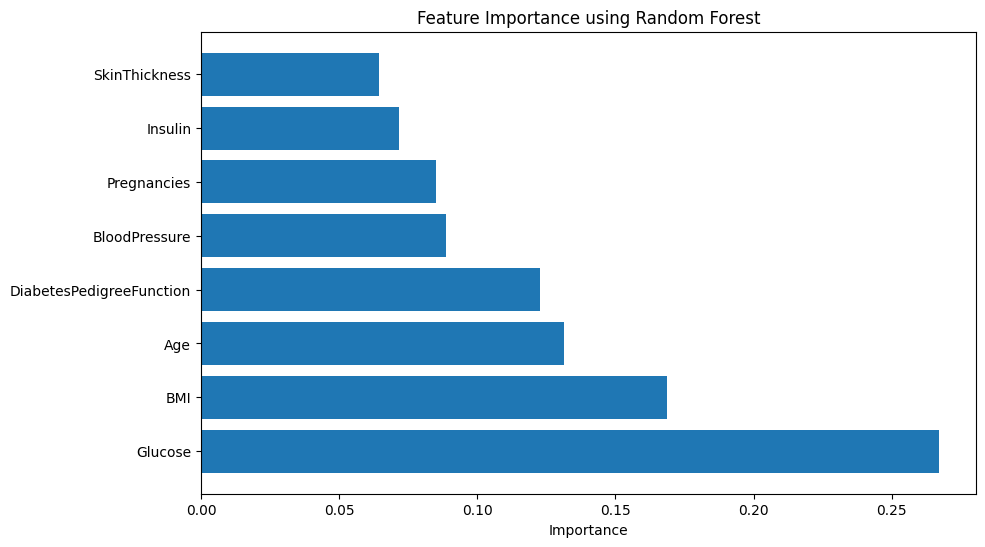


                     Feature  Importance
1                   Glucose    0.267142
5                       BMI    0.168769
7                       Age    0.131567
6  DiabetesPedigreeFunction    0.122695
2             BloodPressure    0.088660
0               Pregnancies    0.085017
4                   Insulin    0.071547
3             SkinThickness    0.064604


In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Menyiapkan data fitur dan target
X = df[numerical_features]  # Fitur numerik
y = df['Outcome']  # Target: Outcome

# Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Mengambil pentingnya fitur
feature_importances_rf = rf_model.feature_importances_

# Menampilkan pentingnya fitur
feature_df_rf = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances_rf
})

# Mengurutkan berdasarkan pentingnya fitur
feature_df_rf = feature_df_rf.sort_values(by='Importance', ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_df_rf['Feature'], feature_df_rf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

# Menampilkan fitur yang paling penting
print("\n", feature_df_rf)


# Pilih dan Eksekusi Feature Selection

In [19]:
# Daftar fitur yang akan dihapus
features_to_remove = ['SkinThickness', 'Insulin', 'Pregnancies', 'BloodPressure']

# Menghapus fitur yang tidak diinginkan dari dataset training dan testing
train_selected_df = train_scaled_df.drop(columns=features_to_remove)
test_selected_df = test_scaled_df.drop(columns=features_to_remove)

# Pisahkan fitur (X) dan target (y) untuk dataset yang sudah dipilih fiturnya
X_train_selected = train_selected_df.drop(columns=['Outcome'])
y_train_selected = train_selected_df['Outcome']
X_test_selected = test_selected_df.drop(columns=['Outcome'])
y_test_selected = test_selected_df['Outcome']

# Menyimpan dataset yang sudah dilakukan feature selection (jika perlu)
train_selected_df.to_csv('diabetes_train_selected.csv', index=False)
test_selected_df.to_csv('diabetes_test_selected.csv', index=False)

print("Feature selection selesai. Dataset terpilih disimpan di 'diabetes_train_selected.csv' dan 'diabetes_test_selected.csv'.")


Feature selection selesai. Dataset terpilih disimpan di 'diabetes_train_selected.csv' dan 'diabetes_test_selected.csv'.


# Data Training

In [20]:
# Menampilkan data training setelah penghapusan fitur
print("Data Training Setelah Penghapusan Fitur:")
print(train_selected_df.head())


Data Training Setelah Penghapusan Fitur:
     Glucose    BMI  DiabetesPedigreeFunction   Age  Outcome
60     0.084  0.000                    0.0304  0.21        0
618    0.112  0.282                    0.1282  0.50        1
346    0.139  0.287                    0.0654  0.22        0
294    0.161  0.219                    0.0254  0.65        0
231    0.134  0.462                    0.0238  0.46        1


# Data Testing

In [21]:
# Menampilkan data testing setelah penghapusan fitur
print("Data Testing Setelah Penghapusan Fitur:")
print(test_selected_df.head())


Data Testing Setelah Penghapusan Fitur:
     Glucose    BMI  DiabetesPedigreeFunction   Age  Outcome
668    0.098  0.340                    0.0430  0.43        0
324    0.112  0.357                    0.0148  0.21        0
624    0.108  0.308                    0.0158  0.21        0
690    0.107  0.246                    0.0856  0.34        0
473    0.136  0.299                    0.0210  0.50        0


# Latin Model K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Menyusun k_values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Latih model KNN untuk setiap nilai k dan simpan hasilnya
knn_models = {}
for k in k_values:
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Latih model
    knn.fit(X_train_selected, y_train_selected)
    
    # Simpan model dalam dictionary
    knn_models[k] = knn

# Menyimpan model-model KNN dalam dictionary knn_models
print("Model KNN berhasil dilatih dengan berbagai nilai k.")


Model KNN berhasil dilatih dengan berbagai nilai k.


# Classification Report

In [23]:
# Menampilkan classification report untuk setiap model KNN
for k, model in knn_models.items():
    print(f"\nClassification Report untuk k = {k}:")
    y_pred = model.predict(X_test_selected)
    print(classification_report(y_test, y_pred))



Classification Report untuk k = 1:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Classification Report untuk k = 3:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           1       0.57      0.65      0.61        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154


Classification Report untuk k = 5:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0

# Visualisasi Akurasi Setiap Nilai K

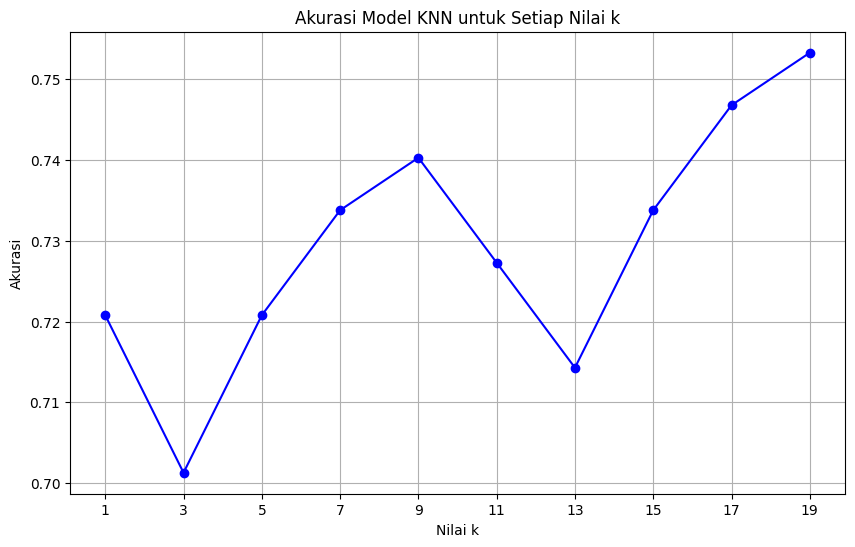


Akurasi untuk setiap nilai k:
k = 1: Akurasi = 0.7208
k = 3: Akurasi = 0.7013
k = 5: Akurasi = 0.7208
k = 7: Akurasi = 0.7338
k = 9: Akurasi = 0.7403
k = 11: Akurasi = 0.7273
k = 13: Akurasi = 0.7143
k = 15: Akurasi = 0.7338
k = 17: Akurasi = 0.7468
k = 19: Akurasi = 0.7532


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk setiap model KNN
accuracies = []
for k, model in knn_models.items():
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test_selected, y_pred)
    accuracies.append(accuracy)

# Membuat plot akurasi terhadap nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Akurasi Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Menampilkan list akurasi untuk setiap nilai k
print("\nAkurasi untuk setiap nilai k:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Akurasi = {accuracy:.4f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

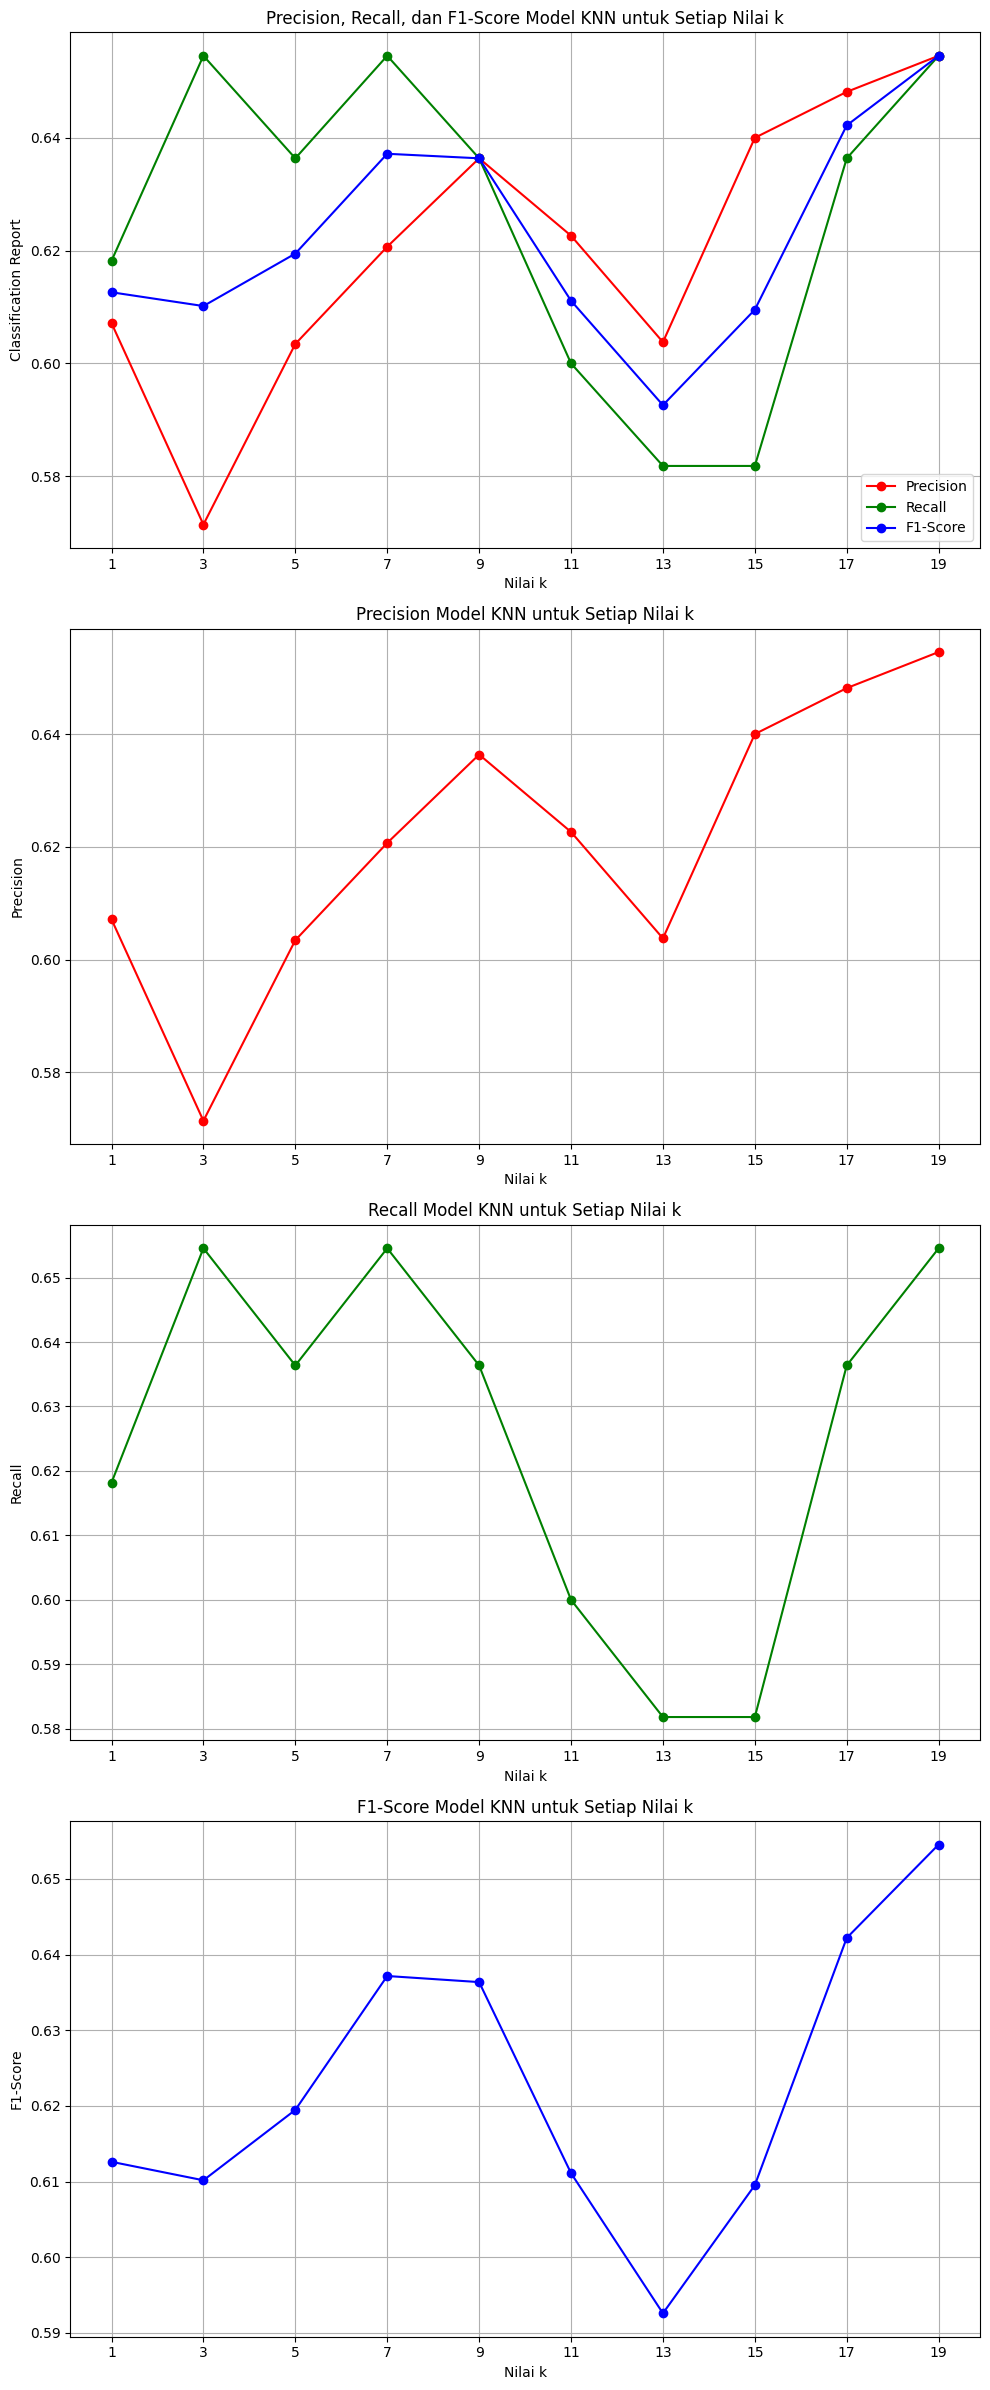


Precision, Recall, dan F1-Score untuk setiap nilai k:
k = 1: Precision = 0.6071, Recall = 0.6182, F1-Score = 0.6126
k = 3: Precision = 0.5714, Recall = 0.6545, F1-Score = 0.6102
k = 5: Precision = 0.6034, Recall = 0.6364, F1-Score = 0.6195
k = 7: Precision = 0.6207, Recall = 0.6545, F1-Score = 0.6372
k = 9: Precision = 0.6364, Recall = 0.6364, F1-Score = 0.6364
k = 11: Precision = 0.6226, Recall = 0.6000, F1-Score = 0.6111
k = 13: Precision = 0.6038, Recall = 0.5818, F1-Score = 0.5926
k = 15: Precision = 0.6400, Recall = 0.5818, F1-Score = 0.6095
k = 17: Precision = 0.6481, Recall = 0.6364, F1-Score = 0.6422
k = 19: Precision = 0.6545, Recall = 0.6545, F1-Score = 0.6545


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Menyimpan metrik precision, recall, dan f1-score untuk setiap model KNN
precisions = []
recalls = []
f1_scores = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test_selected)
    
    precision = precision_score(y_test_selected, y_pred)
    recall = recall_score(y_test_selected, y_pred)
    f1 = f1_score(y_test_selected, y_pred)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Membuat subplots untuk menampilkan precision, recall, f1-score dan gabungannya
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

# Precision, Recall, F1-Score plot (gabungan dalam satu grafik) di posisi pertama
axes[0].plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
axes[0].plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
axes[0].plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label='F1-Score')
axes[0].set_title('Precision, Recall, dan F1-Score Model KNN untuk Setiap Nilai k')
axes[0].set_xlabel('Nilai k')
axes[0].set_ylabel('Classification Report')
axes[0].set_xticks(k_values)
axes[0].grid(True)
axes[0].legend()

# Precision plot
axes[1].plot(k_values, precisions, marker='o', linestyle='-', color='r')
axes[1].set_title('Precision Model KNN untuk Setiap Nilai k')
axes[1].set_xlabel('Nilai k')
axes[1].set_ylabel('Precision')
axes[1].set_xticks(k_values)
axes[1].grid(True)

# Recall plot
axes[2].plot(k_values, recalls, marker='o', linestyle='-', color='g')
axes[2].set_title('Recall Model KNN untuk Setiap Nilai k')
axes[2].set_xlabel('Nilai k')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(k_values)
axes[2].grid(True)

# F1-score plot
axes[3].plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
axes[3].set_title('F1-Score Model KNN untuk Setiap Nilai k')
axes[3].set_xlabel('Nilai k')
axes[3].set_ylabel('F1-Score')
axes[3].set_xticks(k_values)
axes[3].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan nilai precision, recall, dan f1-score untuk setiap k
print("\nPrecision, Recall, dan F1-Score untuk setiap nilai k:")
for k, precision, recall, f1 in zip(k_values, precisions, recalls, f1_scores):
    print(f"k = {k}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


# Hitung P-Values dengan ANOVA

In [26]:
from sklearn.feature_selection import f_classif
import numpy as np

# Menghitung P-Values untuk setiap fitur
f_values, p_values = f_classif(X_train_selected, y_train_selected)

# Menampilkan P-Values untuk setiap fitur
print("P-Values untuk setiap fitur:")
for feature, p_value in zip(X_train.columns, p_values):
    print(f"{feature}: P-Value = {p_value:.4f}")


P-Values untuk setiap fitur:
Pregnancies: P-Value = 0.0000
Glucose: P-Value = 0.0000
BloodPressure: P-Value = 0.0001
SkinThickness: P-Value = 0.0000


# Visualisasi P-Values dengan ANOVA

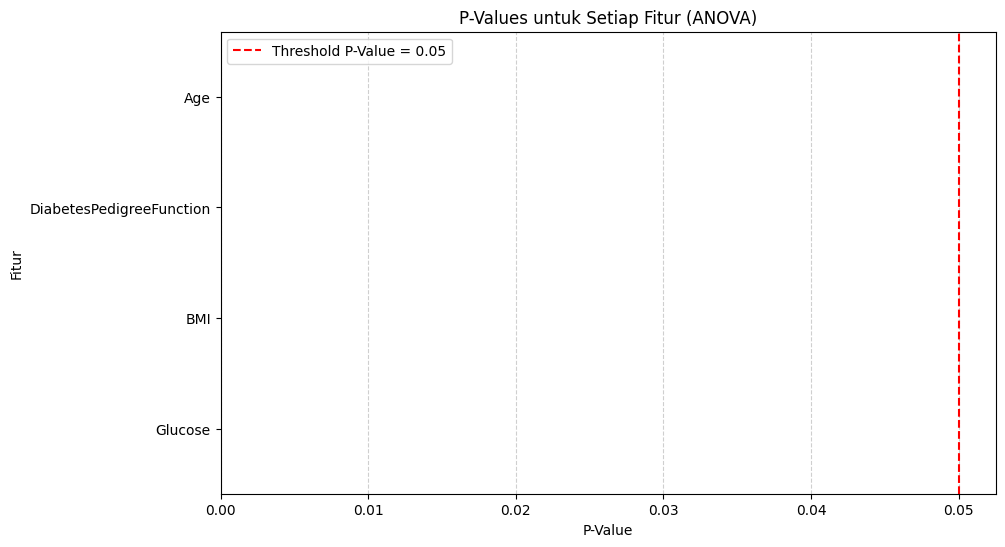

In [27]:
from sklearn.feature_selection import f_classif

# Misalkan Anda telah melakukan ANOVA untuk menghitung p-values pada fitur yang dipilih
f_values, p_values = f_classif(X_train_selected, y_train_selected)

# Membuat plot untuk P-Values
plt.figure(figsize=(10, 6))

# Membuat bar chart untuk P-Values
plt.barh(X_train_selected.columns, p_values, color='skyblue')
plt.axvline(x=0.05, color='r', linestyle='--', label='Threshold P-Value = 0.05')  # Menambahkan threshold P-Value
plt.title('P-Values untuk Setiap Fitur (ANOVA)')
plt.xlabel('P-Value')
plt.ylabel('Fitur')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Menampilkan chart
plt.show()


# Hitung Specificity

In [28]:
from sklearn.metrics import confusion_matrix

# Menyimpan nilai Specificity untuk setiap model KNN
specificities = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test_selected)
    
    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test_selected, y_pred).ravel()
    
    # Menghitung Specificity
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Menampilkan Specificity untuk setiap nilai k
print("Specificity untuk setiap nilai k:")
for k, specificity in zip(k_values, specificities):
    print(f"k = {k}: Specificity = {specificity:.4f}")


Specificity untuk setiap nilai k:
k = 1: Specificity = 0.7778
k = 3: Specificity = 0.7273
k = 5: Specificity = 0.7677
k = 7: Specificity = 0.7778
k = 9: Specificity = 0.7980
k = 11: Specificity = 0.7980
k = 13: Specificity = 0.7879
k = 15: Specificity = 0.8182
k = 17: Specificity = 0.8081
k = 19: Specificity = 0.8081


# Visualisasi Specificity Setiap Nilai K

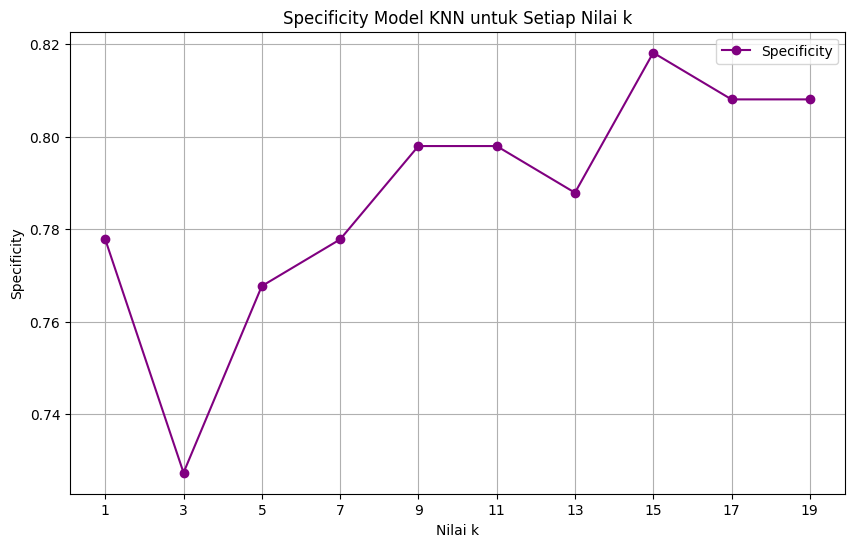

In [29]:
import matplotlib.pyplot as plt

# Membuat plot untuk Specificity terhadap nilai k
plt.figure(figsize=(10, 6))

# Plot Specificity
plt.plot(k_values, specificities, marker='o', linestyle='-', color='purple', label='Specificity')

# Menambahkan judul dan label
plt.title('Specificity Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Specificity')
plt.xticks(k_values)
plt.grid(True)

# Menambahkan legend
plt.legend()

# Menampilkan chart
plt.show()
